In [183]:
#importing the libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix,classification_report

In [184]:
#import the dataset
df = pd.read_excel("E:\Data Science\Assignment-5\loan.xlsx")
print(df)

    Sex        Age  Time_at_address Res_status  Telephone Occupation  \
0     M  50.750000            0.585      owner      given  unemploye   
1     M  19.670000           10.000       rent  not_given   labourer   
2     F  52.830002           15.000      owner      given  creative_   
3     M  22.670000            2.540       rent  not_given  creative_   
4     M  29.250000           13.000      owner      given     driver   
..   ..        ...              ...        ...        ...        ...   
424   M  34.169998            2.750      owner      given  guard_etc   
425   F  22.250000            1.250       rent  not_given  unemploye   
426   M  23.330000            1.500      owner      given  creative_   
427   M  21.000000            4.790       rent  not_given  productio   
428   M  27.750000            1.290      owner      given   labourer   

    Job_status  Time_employed  Time_bank Liab_ref    Acc_ref  Home_Expn  \
0    unemploye              0          0        f      given

In [185]:
#size of dataset
df.shape

(429, 14)

In [186]:
#print top rows
df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [187]:
#label encoding for convert it into numeric form
le_Sex = LabelEncoder()
le_Res_status = LabelEncoder()
le_Telephone = LabelEncoder()
le_Occupation = LabelEncoder()
le_Job_status = LabelEncoder()
le_Liab_ref = LabelEncoder()
le_Acc_ref = LabelEncoder()
le_Decision = LabelEncoder()

In [188]:
#transformation of column
df['Sex_n'] = le_Sex.fit_transform(df['Sex'])
df['Res_status_n'] = le_Res_status.fit_transform(df['Res_status'])
df['Telephone_n'] = le_Telephone.fit_transform(df['Telephone'])
df['Occupation_n'] = le_Occupation.fit_transform(df['Occupation'])
df['Job_status_n'] = le_Job_status.fit_transform(df['Job_status'])
df['Liab_ref_n'] = le_Liab_ref.fit_transform(df['Liab_ref'])
df['Acc_ref_n'] = le_Acc_ref.fit_transform(df['Acc_ref'])
df['Decision_n'] = le_Acc_ref.fit_transform(df['Decision'])
df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,...,Balance,Decision,Sex_n,Res_status_n,Telephone_n,Occupation_n,Job_status_n,Liab_ref_n,Acc_ref_n,Decision_n
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,...,0,reject,1,0,0,11,6,0,0,1
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,...,0,reject,1,1,1,4,0,1,0,1
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,...,2200,accept,0,0,0,0,2,0,0,0
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,...,0,accept,1,1,1,0,0,0,0,0
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,...,0,reject,1,0,0,1,0,0,0,1


In [189]:
#drop unwated column
data = df.drop(['Sex','Res_status','Telephone','Occupation','Job_status','Liab_ref','Acc_ref'],axis="columns")
data

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Decision,Sex_n,Res_status_n,Telephone_n,Occupation_n,Job_status_n,Liab_ref_n,Acc_ref_n,Decision_n
0,50.750000,0.585,0,0,145,0,reject,1,0,0,11,6,0,0,1
1,19.670000,10.000,0,0,140,0,reject,1,1,1,4,0,1,0,1
2,52.830002,15.000,5,14,0,2200,accept,0,0,0,0,2,0,0,0
3,22.670000,2.540,2,0,0,0,accept,1,1,1,0,0,0,0,0
4,29.250000,13.000,0,0,228,0,reject,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,34.169998,2.750,2,0,232,200,reject,1,0,0,3,4,1,0,1
425,22.250000,1.250,3,0,280,0,reject,0,1,1,11,6,0,0,1
426,23.330000,1.500,1,0,422,200,accept,1,0,0,0,0,0,0,0
427,21.000000,4.790,2,1,80,300,accept,1,1,1,7,2,1,0,0


In [197]:
#check data is null or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              429 non-null    float64
 1   Time_at_address  429 non-null    float64
 2   Time_employed    429 non-null    int64  
 3   Time_bank        429 non-null    int64  
 4   Home_Expn        429 non-null    int64  
 5   Balance          429 non-null    int64  
 6   Decision         429 non-null    object 
 7   Sex_n            429 non-null    int32  
 8   Res_status_n     429 non-null    int32  
 9   Telephone_n      429 non-null    int32  
 10  Occupation_n     429 non-null    int32  
 11  Job_status_n     429 non-null    int32  
 12  Liab_ref_n       429 non-null    int32  
 13  Acc_ref_n        429 non-null    int32  
 14  Decision_n       429 non-null    int32  
dtypes: float64(2), int32(8), int64(4), object(1)
memory usage: 37.0+ KB


In [198]:
# check for missing values in variables

df.isnull().sum()

Sex                0
Age                0
Time_at_address    0
Res_status         0
Telephone          0
Occupation         0
Job_status         0
Time_employed      0
Time_bank          0
Liab_ref           0
Acc_ref            0
Home_Expn          0
Balance            0
Decision           0
Sex_n              0
Res_status_n       0
Telephone_n        0
Occupation_n       0
Job_status_n       0
Liab_ref_n         0
Acc_ref_n          0
Decision_n         0
dtype: int64

In [199]:
#assign x and y
x = data[['Age','Time_at_address','Time_employed','Time_bank','Home_Expn','Balance','Sex_n','Res_status_n','Telephone_n','Occupation_n','Job_status_n','Liab_ref_n','Acc_ref_n']]
y = data['Decision_n']

In [200]:
#splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.3)

In [201]:
#shape of data
x_train.shape, x_test.shape

((300, 13), (129, 13))

In [202]:
#perform svm on normal c 
svc = svm.SVC()

svc.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("report",classification_report(y_test,y_pred))

Accuracy: 0.7829457364341085
report               precision    recall  f1-score   support

           0       0.83      0.69      0.75        62
           1       0.75      0.87      0.81        67

    accuracy                           0.78       129
   macro avg       0.79      0.78      0.78       129
weighted avg       0.79      0.78      0.78       129



Text(95.72222222222221, 0.5, 'Reject')

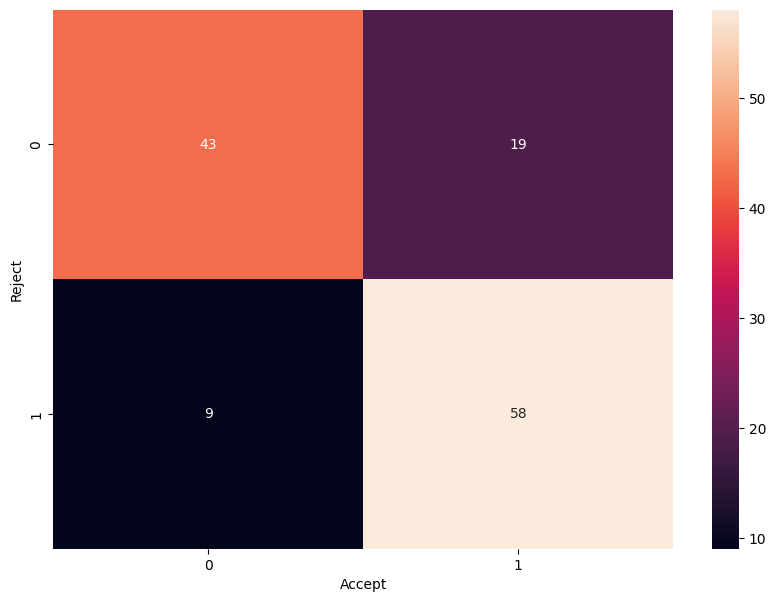

In [203]:
cm = confusion_matrix(y_test,y_pred)
cm
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Accept')
plt.ylabel('Reject')

In [204]:
#svm where c=100 and accuracy of result
svc=svm.SVC(C=100.0) 

svc.fit(x_train,y_train)

y_pred=svc.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("report",classification_report(y_test,y_pred))

Accuracy: 0.7054263565891473
report               precision    recall  f1-score   support

           0       0.82      0.50      0.62        62
           1       0.66      0.90      0.76        67

    accuracy                           0.71       129
   macro avg       0.74      0.70      0.69       129
weighted avg       0.73      0.71      0.69       129



Text(95.72222222222221, 0.5, 'Reject')

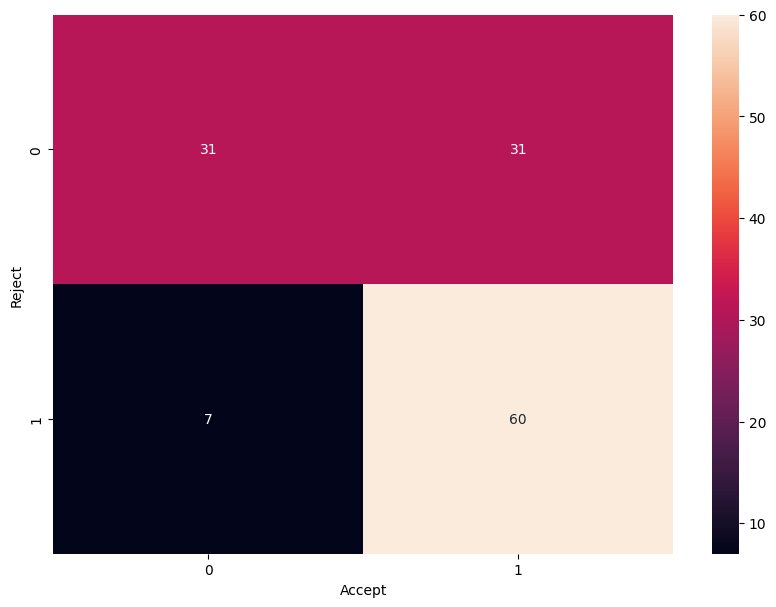

In [205]:
cm = confusion_matrix(y_test,y_pred)
cm
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Accept')
plt.ylabel('Reject')

In [206]:
#svm when c =1000 and accuracy of result
svc=svm.SVC(C=1000.0) 

svc.fit(x_train,y_train)

y_pred=svc.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("report",classification_report(y_test,y_pred))

Accuracy: 0.6976744186046512
report               precision    recall  f1-score   support

           0       0.79      0.50      0.61        62
           1       0.66      0.88      0.75        67

    accuracy                           0.70       129
   macro avg       0.73      0.69      0.68       129
weighted avg       0.72      0.70      0.69       129



Text(95.72222222222221, 0.5, 'Reject')

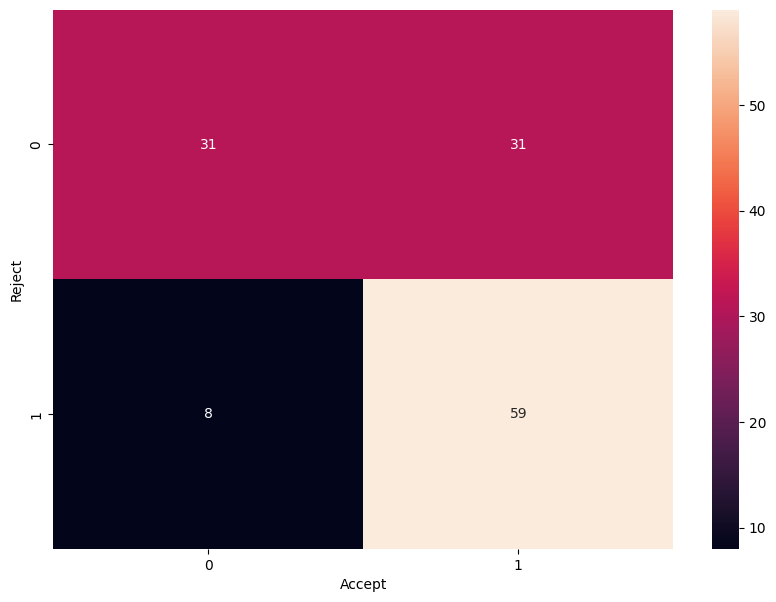

In [207]:
cm = confusion_matrix(y_test,y_pred)
cm
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Accept')
plt.ylabel('Reject')

In [ ]:
#svm for kernal = linear and accuracy of result
svc=svm.SVC(kernel='linear', C=1.0) 

svc.fit(x_train,y_train)

y_pred=svc.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("report",classification_report(y_test,y_pred))

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Accept')
plt.ylabel('Reject')

In [ ]:
#svm for poly kernal and accuracy of result
svc=svm.SVC(kernel='poly', C=1.0) 

svc.fit(x_train,y_train)

y_pred=svc.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("report",classification_report(y_test,y_pred))

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Accept')
plt.ylabel('Reject')

In [ ]:
#svm for sigmoid kernal and accuracy of result
svc=svm.SVC(kernel='sigmoid', C=1.0) 

svc.fit(x_train,y_train)

y_pred=svc.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("report",classification_report(y_test,y_pred))

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Accept')
plt.ylabel('Reject')